Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [106]:
from explore_data import *
from random import uniform
import re
import seaborn as sns
sns.set()

In [91]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('train.csv')
# val = ********************* Split the train/val sets
test = pd.read_csv('test.csv')

In [92]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [93]:
train.shape

(4087, 3)

In [114]:
test.head()

,id,description
0,3461,\nStyle: Speyside single malt scotch Color: Wa...
1,2604,"\nVery bright and lively, with a nice balance ..."
2,3341,\nA new oloroso-forward Chivas positioned to s...
3,3764,\nAged in bourbon casks and then enhanced in R...
4,2306,\nThere is a freshness to the wood on the nose...


In [116]:
target = 'ratingCategory'
feature = 'description'
X_train = train[feature]
y_train = train[target]
X_test = test[feature]

In [95]:
def no_new_line(data):
    new = data.replace('\n', '')
    new = new.replace('\r', '')
    return new

def no_ascii(data):
    new = data.replace('\xa0', '')
    return new

def tokenizer(text):
    tokens = re.sub('[^a-zA-Z ^0-9 \s]', r'', text)
    tokens = tokens.lower()
    return tokens

In [117]:
X_train = X_train.apply(no_new_line).apply(no_ascii).apply(tokenizer)
X_test = X_test.apply(no_new_line).apply(no_ascii).apply(tokenizer)

In [118]:
X_train[0]

'sometimes when whisky is batched a few leftover barrels are returned to the warehouse canadian club recently pulled and vatted several of these from the 1970s acetone granny smith apples and freshcut white cedar showcase this long age complex and spicy yet reserved this dram is ripe with strawberries canned pears cloves pepper and faint flowers then slightly pulling oak tannins distinct elegant and remarkably vibrant this ancient canadian club is anything but tired australia onlya133'

In [119]:
median_words_per_sample = get_num_words_per_sample(X_train)
print(f'Median words per sample: {median_words_per_sample}')

Median words per sample: 70.0


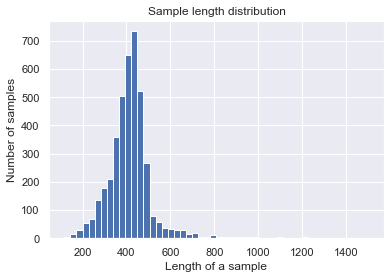

In [120]:
plot_sample_length_distribution(X_train)

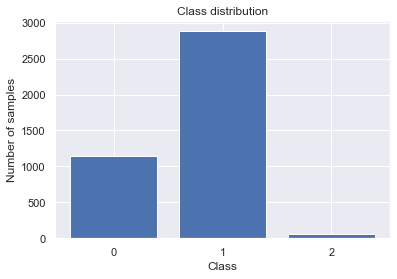

In [121]:
plot_class_distribution(y_train)

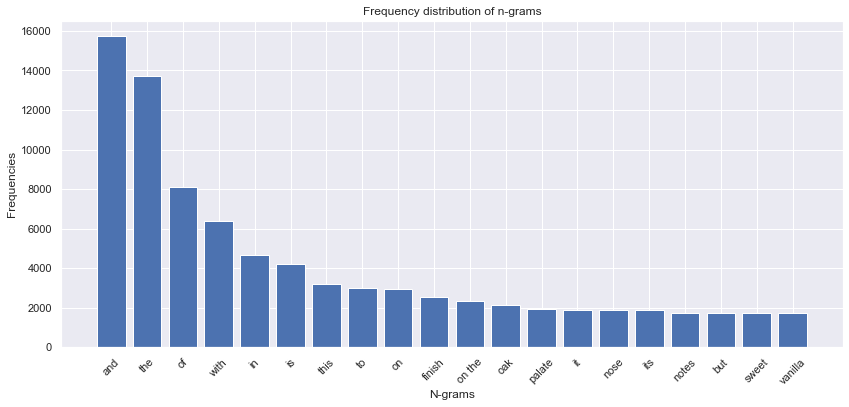

In [122]:
plot_frequency_distribution_of_ngrams(X_train,
                                      ngram_range=(1, 2),
                                      num_ngrams=20)

### Define Pipeline Components

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

pipe = Pipeline([
    ('vect', vect), 
    ('clf', rfc)
])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [108]:
parameters = {
    'vect__max_df': (0.6, 1.0),
    'vect__min_df': (.03, .09),
    'vect__max_features': (5000, 1000, None),
    'clf__n_estimators': (25, 100),
    'clf__max_depth': [10, 15, 20, 25, 30],
    'clf__min_samples_leaf': [2, 5, 7, 9, 12]
}
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1120 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed: 23.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [7]:
parameters = {
    'vect__max_df': (0.6, 0.9),
    'vect__min_df': (.02, .05),
    'vect__max_features': (5000, None),
    'rfc__n_estimators': (100, 250),
    'rfc__max_depth': (15, None)
}

grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   42.5s
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed:  2.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'vect__max_df': (0.6, 0.9), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (2500, 5000), 'rfc__n_estimators': (100, 250), 'rfc__max_depth': (15, None)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [125]:
grid_search.best_params_

{'clf__max_depth': 30,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 100,
 'vect__max_df': 0.6,
 'vect__max_features': 1500,
 'vect__min_df': 0.03}

In [126]:
grid_search.best_score_

0.7254730617411784

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [128]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [129]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [130]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [131]:
subNumber = 0

In [133]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [ ]:
lsi = ...
vect = ...
clf = ...

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

In [134]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)
pipe = Pipeline([
    ('vect', vect),      # TF-IDF Vectorizer
    ('svd', svd),        # Truncated SVD Dimensionality Reduction
    ('clf', rfc)         # RandomForest Classifier
])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [136]:
parameters = {
    'svd__n_components': [10,100,250],
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed: 10.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [137]:
grid_search.best_params_

{'clf__max_depth': 10, 'svd__n_components': 10, 'vect__max_df': 1.0}

In [138]:
grid_search.best_score_

0.7200904974667293

### Make a Submission File

In [139]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [140]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [141]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [142]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [153]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}
gbc = GradientBoostingClassifier()

In [144]:
# Continue Word Embedding Work Here
import spacy
nlp = spacy.load("en_core_web_lg")

In [147]:
nlp_vector = nlp(X_train[0]).vector
print(len(nlp_vector))

300


In [148]:
nlp_vector

array([-3.54431383e-02,  1.29158556e-01, -1.51177883e-01, -7.67005682e-02,
        1.24930747e-01,  2.38393862e-02, -9.29450840e-02, -2.09006947e-02,
        3.93301155e-03,  1.64640808e+00, -9.30332839e-02,  2.90601533e-02,
       -9.81296599e-02, -1.30843014e-01, -2.08349861e-02, -1.58842012e-01,
       -2.32938044e-02,  9.21107352e-01, -4.90631945e-02, -6.51615784e-02,
        4.29057144e-03, -6.03467301e-02, -1.52175445e-02,  1.30326506e-02,
       -1.22929022e-01, -7.76172355e-02, -2.30736528e-02,  5.28754294e-02,
        2.21572146e-02, -1.44063622e-01, -3.39243226e-02,  8.88113454e-02,
        1.06177151e-01, -9.90645885e-02, -8.72409809e-03,  2.20883731e-02,
        2.39401106e-02, -5.97703643e-02, -1.05232090e-01,  2.12294888e-02,
       -2.07555876e-03,  9.51510668e-02,  8.55150148e-02, -9.87129733e-02,
        1.26801446e-01,  1.31443381e-01, -4.53364812e-02, -1.08755901e-01,
        1.00421356e-02,  7.48955980e-02, -1.09351948e-01, -1.86222710e-03,
        8.35009199e-03, -

In [149]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [ ]:
X = get_word_vectors(X_train)

In [151]:
len(X) == len(X_train)

True

In [152]:
X_test_emb = get_word_vectors(X_test)

In [154]:
gbc.fit(X, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [156]:
gbc.score(X_test)

TypeError: score() missing 1 required positional argument: 'y'

In [157]:
search = RandomizedSearchCV(gbc, param_dist, cv=2, n_iter=5, n_jobs=-1, verbose=10)

In [158]:
search.fit(X, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  2.5min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  2.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.0min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [159]:
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

In [160]:
search.best_score_

0.7355029775674276

### Make a Submission File

In [167]:
# Predictions on test sample
pred = search.predict(X_test_emb)

In [168]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [169]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [170]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?